In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []


for i in range(1, pages + 1):

    print(f"Scraping page {i}")


    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"


    response = requests.get(url)


    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Another awful experience b...
1,"✅ Trip Verified | The service was rude, full..."
2,✅ Trip Verified | This flight was a joke. Th...
3,✅ Trip Verified | This time British Airways ...
4,"✅ Trip Verified | The seats were excellent, ..."


In [6]:
df

,reviews
0,✅ Trip Verified | Another awful experience b...
1,"✅ Trip Verified | The service was rude, full..."
2,✅ Trip Verified | This flight was a joke. Th...
3,✅ Trip Verified | This time British Airways ...
4,"✅ Trip Verified | The seats were excellent, ..."
...,...
995,✅ Trip Verified | Glasgow to Tampa via Gatwic...
996,Not Verified | Orlando to Gatwick. Travelling...
997,✅ Trip Verified | London to Abu Dhabi. This i...
998,✅ Trip Verified | London to St Petersburgh. H...


In [7]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [8]:
df

,reviews
0,Another awful experience by British Airways...
1,"The service was rude, full of attitude to m..."
2,This flight was a joke. There was four peop...
3,This time British Airways managed to get ev...
4,"The seats were excellent, with a feel of mu..."
...,...
995,Glasgow to Tampa via Gatwick. Early morning ...
996,Orlando to Gatwick. Travelling home was extr...
997,London to Abu Dhabi. This is the daytime fli...
998,London to St Petersburgh. Huge disappointmen...


In [9]:
import re

def clean(text):

    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Another awful experience by British Airways...,Another awful experience by British Airways T...
1,"The service was rude, full of attitude to m...",The service was rude full of attitude to me t...
2,This flight was a joke. There was four peop...,This flight was a joke There was four people ...
3,This time British Airways managed to get ev...,This time British Airways managed to get ever...
4,"The seats were excellent, with a feel of mu...",The seats were excellent with a feel of much ...


In [10]:
import nltk


nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

from nltk.tokenize import word_tokenize
from nltk import pos_tag

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


,reviews,Cleaned Reviews,POS tagged
0,Another awful experience by British Airways...,Another awful experience by British Airways T...,"[(Another, None), (awful, a), (experience, n),..."
1,"The service was rude, full of attitude to m...",The service was rude full of attitude to me t...,"[(service, n), (rude, a), (full, a), (attitude..."
2,This flight was a joke. There was four peop...,This flight was a joke There was four people ...,"[(flight, n), (joke, n), (four, None), (people..."
3,This time British Airways managed to get ev...,This time British Airways managed to get ever...,"[(time, n), (British, a), (Airways, n), (manag..."
4,"The seats were excellent, with a feel of mu...",The seats were excellent with a feel of much ...,"[(seats, n), (excellent, a), (feel, n), (much,..."


In [15]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Another awful experience by British Airways...,Another awful experience by British Airways T...,"[(Another, None), (awful, a), (experience, n),...",Another awful experience British Airways fli...
1,"The service was rude, full of attitude to m...",The service was rude full of attitude to me t...,"[(service, n), (rude, a), (full, a), (attitude...",service rude full attitude food poorly servi...
2,This flight was a joke. There was four peop...,This flight was a joke There was four people ...,"[(flight, n), (joke, n), (four, None), (people...",flight joke four people business class inclu...
3,This time British Airways managed to get ev...,This time British Airways managed to get ever...,"[(time, n), (British, a), (Airways, n), (manag...",time British Airways manage get everything r...
4,"The seats were excellent, with a feel of mu...",The seats were excellent with a feel of much ...,"[(seats, n), (excellent, a), (feel, n), (much,...",seat excellent feel much room official seat ...


In [16]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Another awful experience by British Airways...,Another awful experience British Airways fli...
1,"The service was rude, full of attitude to m...",service rude full attitude food poorly servi...
2,This flight was a joke. There was four peop...,flight joke four people business class inclu...
3,This time British Airways managed to get ev...,time British Airways manage get everything r...
4,"The seats were excellent, with a feel of mu...",seat excellent feel much room official seat ...
...,...,...
995,Glasgow to Tampa via Gatwick. Early morning ...,Glasgow Tampa via Gatwick Early morning flig...
996,Orlando to Gatwick. Travelling home was extr...,Orlando Gatwick Travelling home extremely di...
997,London to Abu Dhabi. This is the daytime fli...,London Abu Dhabi daytime flight London good ...
998,London to St Petersburgh. Huge disappointmen...,London St Petersburgh Huge disappointment BA...


In [17]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Another awful experience by British Airways...,Another awful experience by British Airways T...,"[(Another, None), (awful, a), (experience, n),...",Another awful experience British Airways fli...,-0.8316,Negative
1,"The service was rude, full of attitude to m...",The service was rude full of attitude to me t...,"[(service, n), (rude, a), (full, a), (attitude...",service rude full attitude food poorly servi...,-0.6437,Negative
2,This flight was a joke. There was four peop...,This flight was a joke There was four people ...,"[(flight, n), (joke, n), (four, None), (people...",flight joke four people business class inclu...,-0.2960,Negative
3,This time British Airways managed to get ev...,This time British Airways managed to get ever...,"[(time, n), (British, a), (Airways, n), (manag...",time British Airways manage get everything r...,0.9831,Positive
4,"The seats were excellent, with a feel of mu...",The seats were excellent with a feel of much ...,"[(seats, n), (excellent, a), (feel, n), (much,...",seat excellent feel much room official seat ...,0.5719,Positive


In [19]:
vader_counts = df['Analysis'].value_counts()
vader_counts

,count
Analysis,
Positive,458
Negative,428
Neutral,114


([<matplotlib.patches.Wedge at 0x7d54d55901d0>,
 [Text(0.14472077993864235, 1.0904383961755708, 'Positive'),
  Text(-0.5177738596364118, -0.97052059755433, 'Negative'),
  Text(1.264342496214026, -0.47322093388531056, 'Neutral')],
 [Text(0.07893860723925945, 0.5947845797321295, '45.8%'),
  Text(-0.2824221052562246, -0.5293748713932708, '42.8%'),
  Text(0.7960674976162386, -0.2979539213351955, '11.4%')])

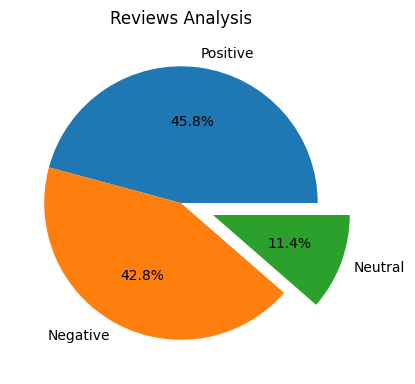

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [21]:
df.to_csv("BA_reviews.csv")

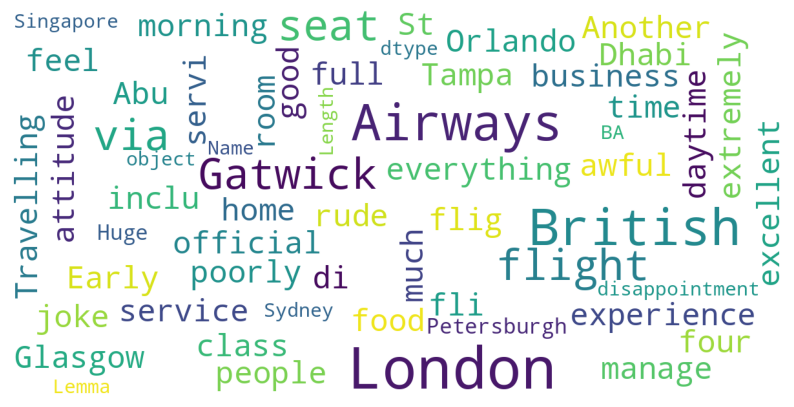

In [23]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(10, 10))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)
